<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_12_3_pytorch_reinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 12: Reinforcement Learning**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 12 Video Material

* Part 12.1: Introduction to Introduction to Gymnasium [[Video]](https://www.youtube.com/watch?v=FvuyrpzvwdI&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_12_1_reinforcement.ipynb)
* Part 12.2: Introduction to Q-Learning [[Video]](https://www.youtube.com/watch?v=VKuqvbG_KAw&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_12_2_qlearningreinforcement.ipynb)
* **Part 12.3: Stable Baselines Q-Learning** [[Video]](https://www.youtube.com/watch?v=kl7zsCjULN0&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_12_3_pytorch_reinforce.ipynb)
* Part 12.4: Atari Games with Stable Baselines Neural Networks [[Video]](https://www.youtube.com/watch?v=maLA1_d4pzQ&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_12_4_atari.ipynb)
* Part 12.5: Future of Reinforcement Learning [[Video]](https://www.youtube.com/watch?v=-euo5pTjP8E&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_12_5_rl_future.ipynb)


# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 12.3: Stable-Baselines Q-Learning in Gymnasium

As we covered in the previous part, Q-Learning is a robust machine learning algorithm. Unfortunately, Q-Learning requires that the Q-table contain an entry for every possible state that the environment can take. Traditional Q-learning might be a good learning algorithm if the environment only includes a handful of discrete state elements. However, the Q-table can become prohibitively large if the state space is large.

Creating policies for large state spaces is a task that Deep Q-Learning Networks (DQN) can usually handle. Neural networks can generalize these states and learn commonalities. Unlike a table, a neural network does not require the program to represent every combination of state and action. A DQN maps the state to its input neurons and the action Q-values to the output neurons. The DQN effectively becomes a function that accepts the state and suggests action by returning the expected reward for each possible action. Figure 12.DQL demonstrates the DQN structure and mapping between state and action.

**Figure 12.DQL: Deep Q-Learning (DQL)**
![Deep Q-Learning](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/deepqlearning.png "Reinforcement Learning")

As this diagram illustrates, the environment state contains several elements. For the basic DQN, the state can be a mix of continuous and categorical/discrete values. For the DQN, the discrete state elements the program typically encoded as dummy variables. The actions should be discrete when your program implements a DQN. Other algorithms support continuous outputs, which we will discuss later in this chapter.

In the landscape of deep learning, the [Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/) library emerges as a torchbearer for reinforcement learning (RL) enthusiasts and researchers opting for PyTorch. As an evolution of the original Stable Baselines framework, this iteration has been meticulously reforged with the PyTorch backend, providing a suite of reliable, high-performance RL algorithms. It is designed for ease of use, offering a straightforward API that invites both novices and seasoned practitioners to implement, experiment with, and extend upon cutting-edge RL methods. With Stable Baselines 3, one can expect robust pre-trained models, customizable neural network architectures, and comprehensive documentation that empowers users to deploy RL solutions efficiently. Its compatibility with PyTorch means that it seamlessly integrates into the dynamic ecosystem of deep learning tools, allowing for rapid prototyping and research iteration. Whether the goal is to solve discrete control tasks or navigate the complexities of high-dimensional environments.

## DQN and the Cart-Pole Problem

Barto (1983) first described the cart-pole problem. [[Cite:barto1983neuronlike]](http://www.derongliu.org/adp/adp-cdrom/Barto1983.pdf) A cart is connected to a rigid hinged pole. The cart is free to move only in the vertical plane of the cart/track. The agent can apply an impulsive "left" or "right" force F of a fixed magnitude to the cart at discrete time intervals. The cart-pole environment simulates the physics behind keeping the pole reasonably upright position on the cart. The environment has four state variables:
* $x$ The position of the cart on the track.
* $\theta$ The angle of the pole with the vertical
* $\dot{x}$ The cart velocity.
* $\dot{\theta}$ The rate of change of the angle.

The action space consists of discrete actions:
* Apply force left
* Apply force right

First, we must install Stable Baselines.


In [2]:
# HIDE OUTPUT
if COLAB:
  !pip install stable-baselines3[extra] gymnasium
  !pip install gymnasium[accept-rom-license,atari]
  !pip install pyvirtualdisplay
  !sudo apt-get install -y xvfb python-opengl ffmpeg

  Using cached Shimmy-1.1.0-py3-none-any.whl (37 kB)
  Using cached AutoROM-0.6.1-py3-none-any.whl (9.4 kB)
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 0.2.1
    Uninstalling Shimmy-0.2.1:
      Successfully uninstalled Shimmy-0.2.1
  Attempting uninstall: autorom
    Found existing installation: AutoROM 0.4.2
    Uninstalling AutoROM-0.4.2:
      Successfully uninstalled AutoROM-0.4.2
  Using cached Shimmy-0.2.1-py3-none-any.whl (25 kB)
  Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.1.0
    Uninstalling Shimmy-1.1.0:
      Successfully uninstalled Shimmy-1.1.0
  Attempting uninstall: autorom
    Found existing installation: AutoROM 0.6.1
    Uninstalling AutoROM-0.6.1:
      Successfully uninstalled AutoROM-0.6.1
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl


### The Cartpole Environment
In the Cartpole environment:

-   `observation` is an array of 4 floats:
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


In [3]:
import gymnasium as gym

# Create and initialize the MountainCar environment
env = gym.make('CartPole-v1', render_mode="rgb_array")

time_step = env.reset()
print('Time step:')
print(time_step)

action = 1

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)


Time step:
(array([-0.03997597,  0.01010498,  0.04918804,  0.03170852], dtype=float32), {})
Next time step:
(array([-0.03977387,  0.2044883 ,  0.04982221, -0.24505836], dtype=float32), 1.0, False, False, {})


We can also visualize this environment.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


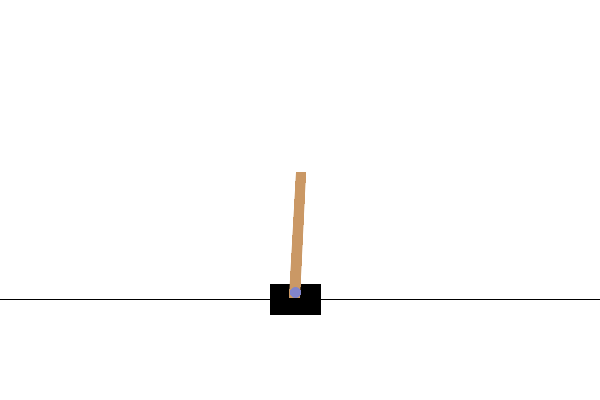

In [4]:
from PIL import Image

# Render the environment's state to a numpy array
frame = env.render()

# Convert the numpy array to an image and display it
image = Image.fromarray(frame)

# Don't forget to close the environment when you're done!
env.close()

display(image)

The goal is to move the above cart without causing the pole to fall over.

## Training the agent

We will make use of Stable-Baselines3 to train an agent for this environment. We will make use of the MlpPolicy, which makes use of a Multi-Layer Peceptron (MLP), which is another name for neural network.


In [5]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

# Create the CartPole environment
env = make_vec_env('CartPole-v1', n_envs=1)

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the agent
model.save("ppo_cartpole")

# Create a fresh environment for evaluation
eval_env = gym.make('CartPole-v1')

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward} +/- {std_reward}")

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


Using cuda device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.7     |
|    ep_rew_mean     | 21.7     |
| time/              |          |
|    fps             | 372      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25.5        |
|    ep_rew_mean          | 25.5        |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009339783 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -8.09e-05   |
|    learnin

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 358.2 +/- 124.27131607897294


## Videos

We can easily visulaize the cart pole ageint in a video.

In [6]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
import base64
from IPython import display as ipythondisplay
from pathlib import Path

# Record the agent playing
video_folder = '/videos'
video_length = 1500

env = make_vec_env('CartPole-v1', n_envs=1)
env = VecVideoRecorder(env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix="ppo-cartpole")

obs = env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, _, _ = env.step(action)

# Close the environment and video recorder
env.close()

# Display the video
video_path = Path(video_folder) / "ppo-cartpole-step-0-to-step-1500.mp4"
video = open(video_path, "rb").read()
encoded = base64.b64encode(video)

ipythondisplay.display(ipythondisplay.HTML(data=f'<video alt="test" autoplay loop controls style="height: 400px;">'
                                        f'<source src="data:video/mp4;base64,{encoded.decode()}" type="video/mp4" />'
                                        f'</video>'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving video to /videos/ppo-cartpole-step-0-to-step-1500.mp4
Moviepy - Building video /videos/ppo-cartpole-step-0-to-step-1500.mp4.
Moviepy - Writing video /videos/ppo-cartpole-step-0-to-step-1500.mp4



Moviepy - Done !
Moviepy - video ready /videos/ppo-cartpole-step-0-to-step-1500.mp4
